【台北大學碩士班課程】統計應用數學與計算<br>
【授課老師】汪群超<br>
【學期】1112 <br>
【主要內容】主成分分析（PCA）在實際資料上的實作<br>
【作者】711133117 陳怡升 <br>
【參考網站】[汪群超 Shallow Machine Learning Lesson5 : 主成分分析的原理與實驗](https://ntpuccw.blog/python-in-learning/sml-lesson-5-%e4%b8%bb%e6%88%90%e5%88%86%e5%88%86%e6%9e%90%e7%9a%84%e5%8e%9f%e7%90%86%e8%88%87%e5%af%a6%e9%a9%97/)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sklearn

In [2]:
file = r'C:\Course\1112ShallowMachineLearning\hw1PCA'

In [2]:
file = r'D:\711133117\1112ShallowMachineLearning'

# 習題1：紅酒資料
有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：

讀取資料

In [42]:
df = pd.read_excel(file + r'\wine.xlsx')
print(df.shape)
df.head(5)

(178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## 繪製變數間的相關係數圖
從下圖可明顯發現，變數之間有相關性，Total_Phenois與Flavanoids有強烈的正相關

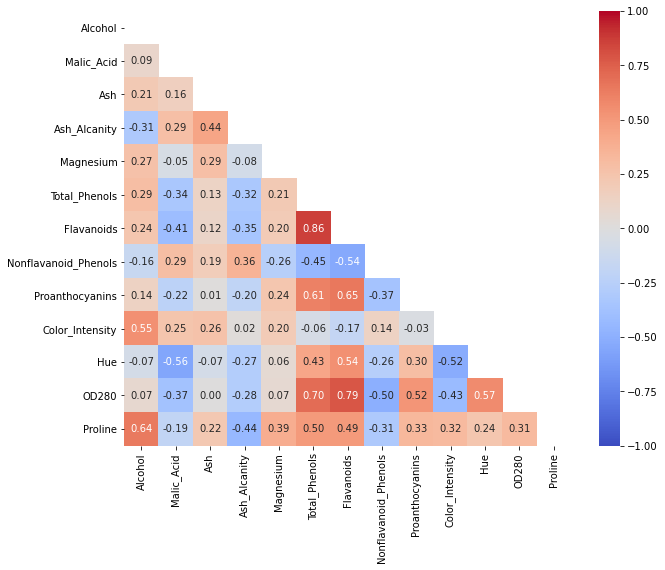

In [43]:
corr =  df.iloc[:,:13].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:,:13].corr(), cmap='coolwarm', annot=True, fmt=".2f", mask=mask, vmax=1, vmin=-1)
plt.show()

## 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot）
題目：觀察每個變數的 scaling，作為是否標準化的參考<br><br>

<font color=#004D99>
    從下方左圖可以觀察出未標準化前各變數的全距差距大，並且Proline的數值比其他變數大許多，接著從下方右圖可以觀察到標準化過後的變數平均數都在0附近，並不會因為變異特別大而對PCA造成特別強烈影響。
</font>

In [4]:
def standard(X):
    return (X-X.mean())/X.std()

In [5]:
X = standard(df.iloc[:,:13])

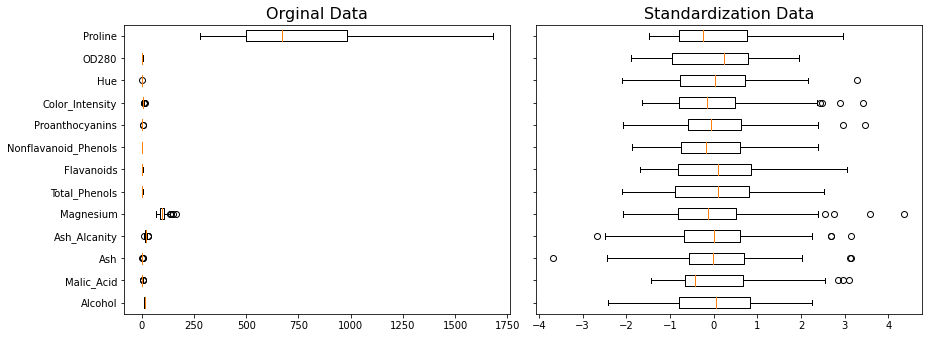

In [107]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8), sharey='row')
axes[0].boxplot(df.iloc[:,:13], vert=False)
axes[1].boxplot(X, vert=False)
axes[0].set_title('Orginal Data', fontsize=16)
axes[1].set_title('Standardization Data', fontsize=16)
plt.yticks(range(1,14), list(df.iloc[:,:13].columns))
plt.tight_layout()
plt.show()

## 繪製特徵值由大而小的分布與 scree plot。
題目：進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

<font color=#004D99>
</font>

In [7]:
Sx = np.cov(X.T, bias=False)
w, v = np.linalg.eig(Sx)
idx = np.argsort(w)[::-1]
eigvalues = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvalues) @ eigvecs.T

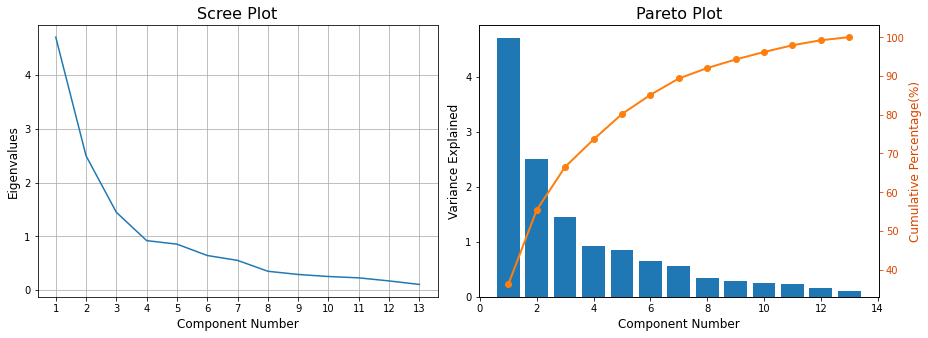

In [137]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
x = np.arange(1,1+len(eigvalues))
axes[0].plot(x, eigvalues)
axes[0].set_xticks(x)
axes[0].set_xlabel('Component Number', fontsize=12)
axes[0].set_ylabel('Eigenvalues', fontsize=12)
axes[0].grid(True)
axes[0].set_title('Scree Plot', fontsize=16)

axes[1].bar(x, eigvalues)
ax2 = axes[1].twinx()
ax2.plot(x, eigvalues.cumsum()/eigvals.sum()*100, marker='o', color='C1', lw=2)
ax2.tick_params(axis='y', colors='#D94600')
ax2.set_ylabel('Cumulative Percentage(%)', fontsize=12, color="#D94600")
axes[1].set_xlabel('Component Number', fontsize=12)
axes[1].set_ylabel('Variance Explained', fontsize=12)
axes[1].set_title('Pareto Plot', fontsize=16)

plt.tight_layout()
plt.show()

## 利用PCA取得前兩項成分，繪製其散布圖
資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

<font color=#004D99>
</font>

In [6]:
pca = PCA().fit(X)
Z = pca.transform(X)
pca_nostand = PCA().fit(df.iloc[:,:13])
Z_nostand = pca.transform(df.iloc[:,:13])

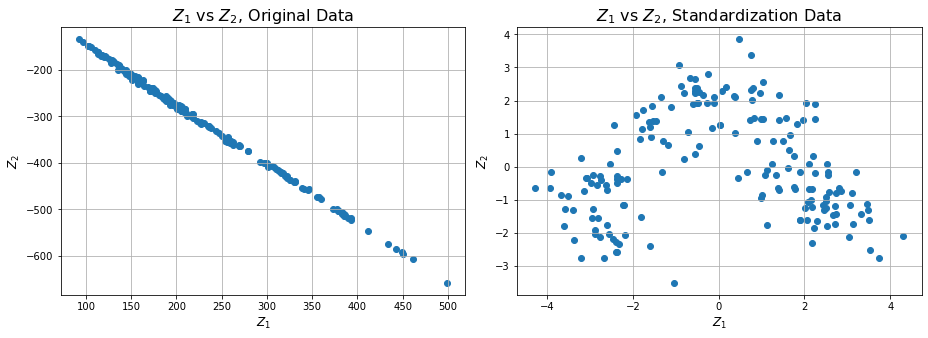

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))

for e, ax in enumerate(axes):
    if e==0:
        drawdf = Z_nostand.copy()
    else:
        drawdf = Z.copy()
    ax.scatter(drawdf[:,0], drawdf[:,1], color='C0')
    ax.set_xlabel(r'$Z_1$', fontsize=12)
    ax.set_ylabel(r'$Z_2$', fontsize=12)
    ax.grid(True)
axes[0].set_title(r'$Z_1$ vs $Z_2$, Original Data', fontsize=16)
axes[1].set_title(r'$Z_1$ vs $Z_2$, Standardization Data', fontsize=16)
    
plt.tight_layout()
plt.show()

## 根據每筆資料的標籤，塗上顏色
再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

<font color=#004D99>
</font>

In [29]:
markerlst = ['^', 's', 'o']

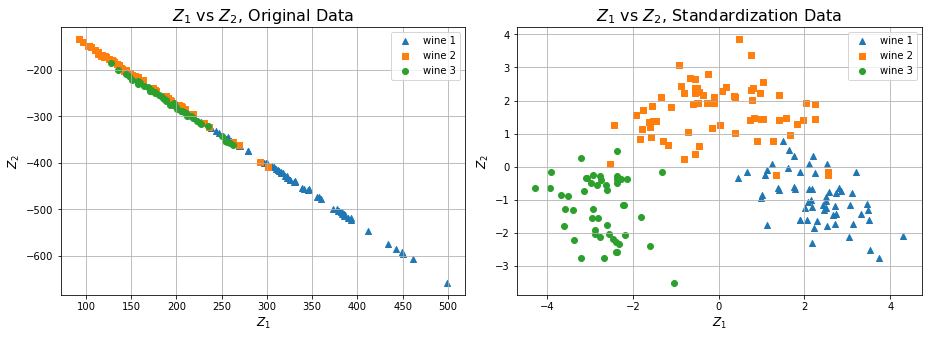

In [49]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
for e, ax in enumerate(axes):
    if e==0:
        drawdf = Z_nostand.copy()
    else:
        drawdf = Z.copy()
    for e2, group in enumerate(set(df['Customer_Segment'])):
        filt = df['Customer_Segment']==group
        ax.scatter(drawdf[filt,0], drawdf[filt,1], label=f'wine {group}', marker=markerlst[e2])
    ax.set_xlabel(r'$Z_1$', fontsize=12)
    ax.set_ylabel(r'$Z_2$', fontsize=12)
    ax.grid(True)
    ax.legend()
axes[0].set_title(r'$Z_1$ vs $Z_2$, Original Data', fontsize=16)
axes[1].set_title(r'$Z_1$ vs $Z_2$, Standardization Data', fontsize=16)

plt.tight_layout()
plt.show()

## 採三個主成分，繪製立體圖
如果採三個主成分，則可繪製立體圖。觀察是否比2維的圖形具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

<font color=#004D99>
</font>

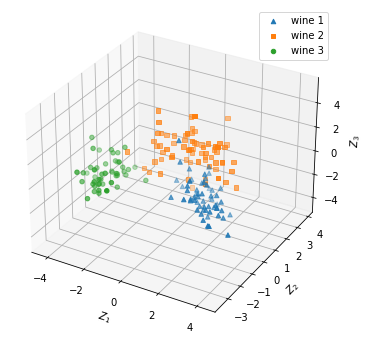

In [50]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
for e, group in enumerate(set(df['Customer_Segment'])):
    filt = df['Customer_Segment']==group
    ax.scatter(Z[filt,0], Z[filt,1], Z[filt,2], label=f'wine {group}', marker=markerlst[e])
ax.legend()
ax.set_xlabel(r'$Z_1$')
ax.set_ylabel(r'$Z_2$')
ax.set_zlabel(r'$Z_3$')
plt.show()

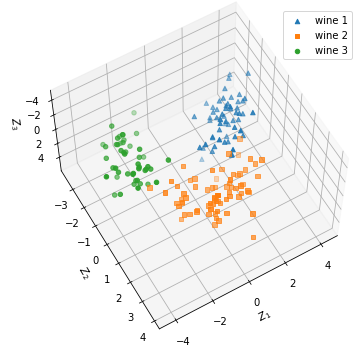

In [51]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
for e, group in enumerate(set(df['Customer_Segment'])):
    filt = df['Customer_Segment']==group
    ax.scatter(Z[filt,0], Z[filt,1], Z[filt,2], label=f'wine {group}', marker=markerlst[e])
ax.legend()
ax.set_xlabel(r'$Z_1$')
ax.set_ylabel(r'$Z_2$')
ax.set_zlabel(r'$Z_3$')
ax.view_init(-120, -60)
plt.show()

## 觀察 $Z_1$ 與 $Z_2$，發現哪個原變數比較重要？
$Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，如下式，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。
\begin{equation}
Z_1 = \mathbf{v}_1(1)X_1 + \mathbf{v}_1(2)X_2 + \cdots + \mathbf{v}_1(p)X_p
\end{equation}

<font color=#004D99>
</font>

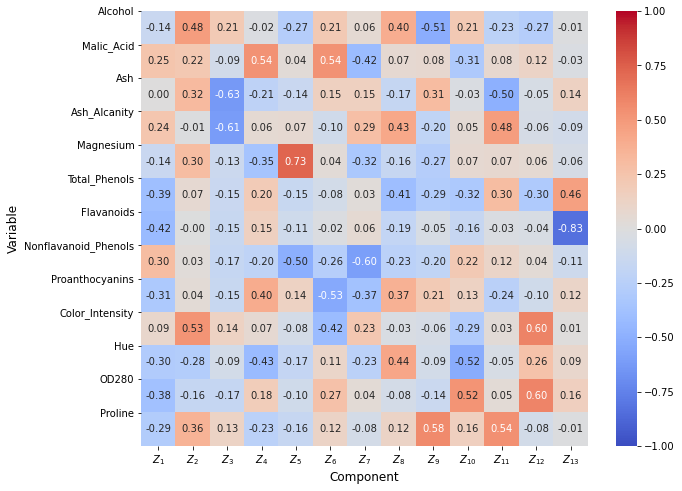

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(eigvecs, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.xlabel('Component', fontsize=12)
plt.xticks(np.arange(0.5,13.5),['$Z_{' + str(i) + '}$' for i in range(1,14)])
plt.ylabel('Variable', fontsize=12)
plt.yticks(range(13), df.iloc[:,:13].columns, rotation=0)
plt.show()

In [ ]:
pca = PCA().fit(X)
eigvalues = pca.explained_variance_
eigvecs = pca.components_

# 習題2：乳癌資料

In [44]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
df = pd.DataFrame(breast['data'], columns=breast['feature_names'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 繪製變數間的相關係數圖
從下圖可明顯發現，變數之間有相關性，Total_Phenois與Flavanoids有強烈的正相關

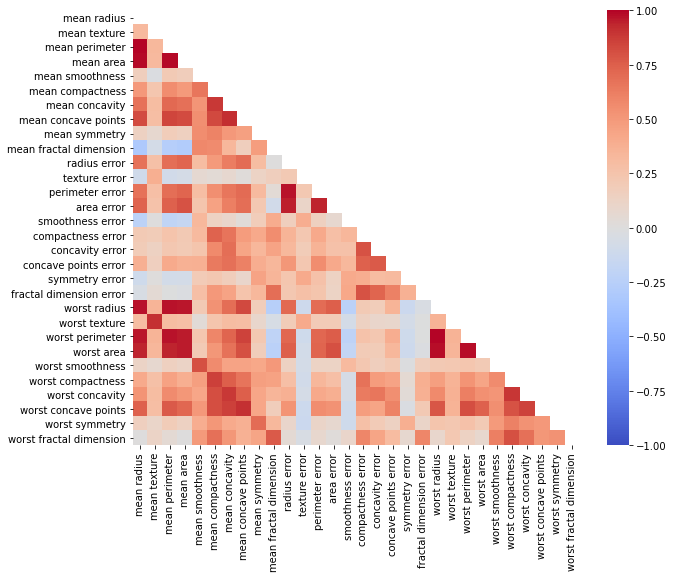

In [48]:
corr =  df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', fmt=".2f", mask=mask, vmax=1, vmin=-1)
plt.show()

## 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot）
題目：觀察每個變數的 scaling，作為是否標準化的參考<br><br>

<font color=#004D99>
    從下方左圖可以觀察出未標準化前各變數的全距差距大，並且Proline的數值比其他變數大許多，接著從下方右圖可以觀察到標準化過後的變數平均數都在0附近，並不會因為變異特別大而對PCA造成特別強烈影響。
</font>

In [49]:
X = standard(df)

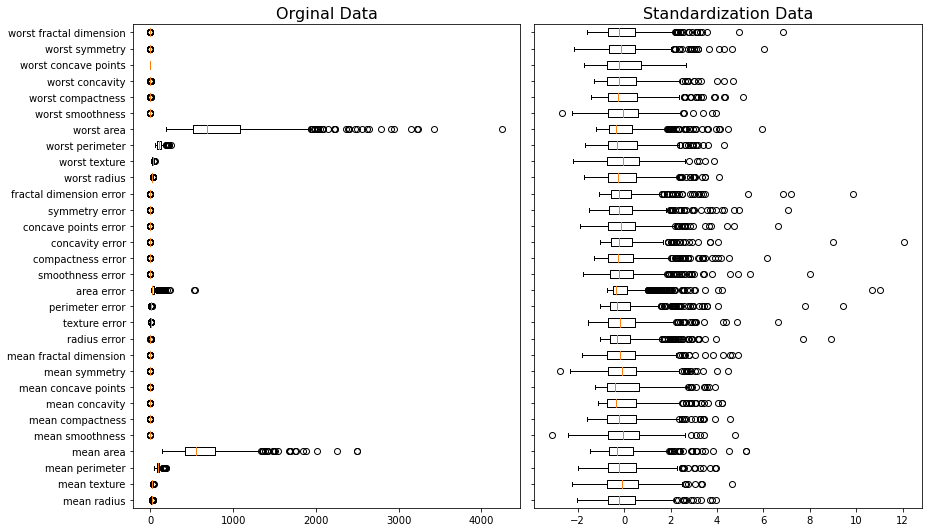

In [53]:
fig, axes = plt.subplots(ncols=2, figsize=(13,7.5), sharey='row')
axes[0].boxplot(df, vert=False)
axes[1].boxplot(X, vert=False)
axes[0].set_title('Orginal Data', fontsize=16)
axes[1].set_title('Standardization Data', fontsize=16)
plt.yticks(range(1,df.shape[1]+1), list(df.columns))
plt.tight_layout()
plt.show()

## 繪製特徵值由大而小的分布與 scree plot。
題目：進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

<font color=#004D99>
</font>

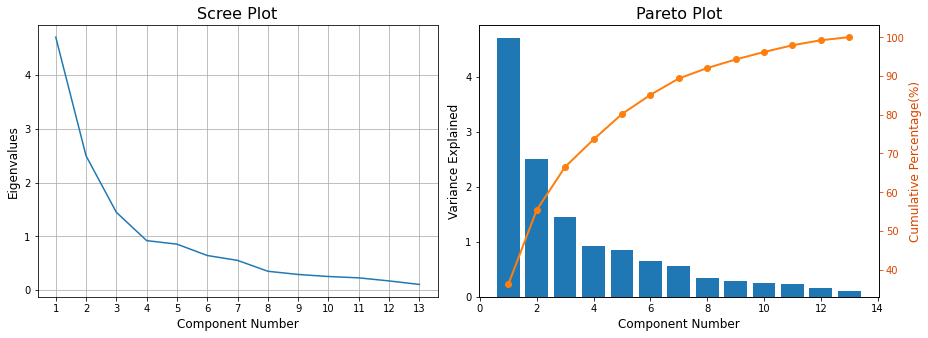

In [137]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
x = np.arange(1,1+len(eigvalues))
axes[0].plot(x, eigvalues)
axes[0].set_xticks(x)
axes[0].set_xlabel('Component Number', fontsize=12)
axes[0].set_ylabel('Eigenvalues', fontsize=12)
axes[0].grid(True)
axes[0].set_title('Scree Plot', fontsize=16)

axes[1].bar(x, eigvalues)
ax2 = axes[1].twinx()
ax2.plot(x, eigvalues.cumsum()/eigvals.sum()*100, marker='o', color='C1', lw=2)
ax2.tick_params(axis='y', colors='#D94600')
ax2.set_ylabel('Cumulative Percentage(%)', fontsize=12, color="#D94600")
axes[1].set_xlabel('Component Number', fontsize=12)
axes[1].set_ylabel('Variance Explained', fontsize=12)
axes[1].set_title('Pareto Plot', fontsize=16)

plt.tight_layout()
plt.show()

## 利用PCA取得前兩項成分，繪製其散布圖
資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

<font color=#004D99>
</font>

In [6]:
pca = PCA().fit(X)
Z = pca.transform(X)
pca_nostand = PCA().fit(df.iloc[:,:13])
Z_nostand = pca.transform(df.iloc[:,:13])

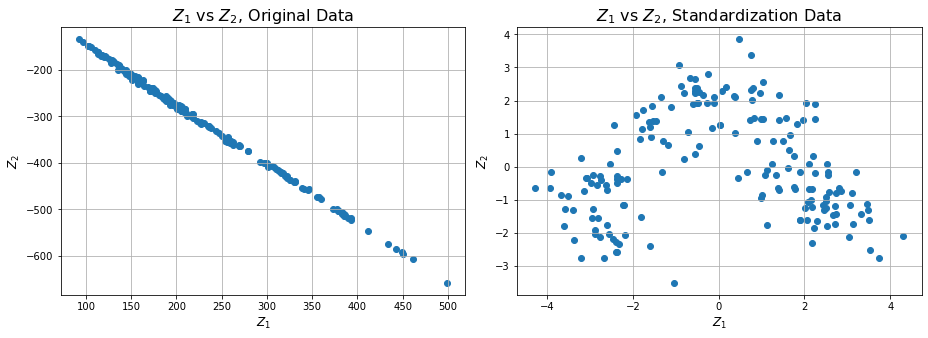

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))

for e, ax in enumerate(axes):
    if e==0:
        drawdf = Z_nostand.copy()
    else:
        drawdf = Z.copy()
    ax.scatter(drawdf[:,0], drawdf[:,1], color='C0')
    ax.set_xlabel(r'$Z_1$', fontsize=12)
    ax.set_ylabel(r'$Z_2$', fontsize=12)
    ax.grid(True)
axes[0].set_title(r'$Z_1$ vs $Z_2$, Original Data', fontsize=16)
axes[1].set_title(r'$Z_1$ vs $Z_2$, Standardization Data', fontsize=16)
    
plt.tight_layout()
plt.show()

## 根據每筆資料的標籤，塗上顏色
再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

<font color=#004D99>
</font>

In [29]:
markerlst = ['^', 's', 'o']

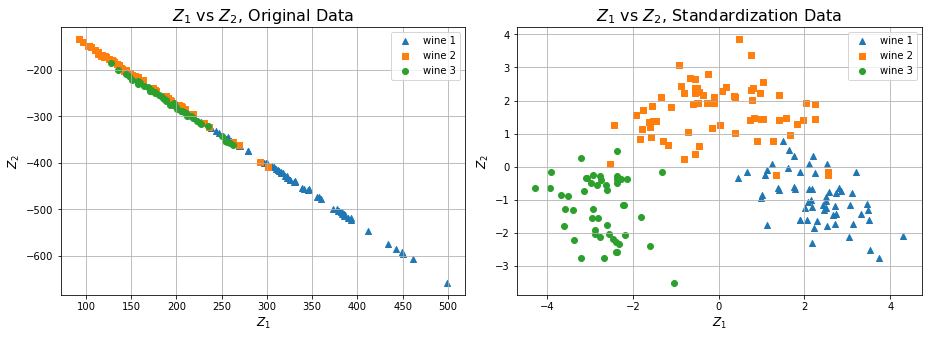

In [49]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
for e, ax in enumerate(axes):
    if e==0:
        drawdf = Z_nostand.copy()
    else:
        drawdf = Z.copy()
    for e2, group in enumerate(set(df['Customer_Segment'])):
        filt = df['Customer_Segment']==group
        ax.scatter(drawdf[filt,0], drawdf[filt,1], label=f'wine {group}', marker=markerlst[e2])
    ax.set_xlabel(r'$Z_1$', fontsize=12)
    ax.set_ylabel(r'$Z_2$', fontsize=12)
    ax.grid(True)
    ax.legend()
axes[0].set_title(r'$Z_1$ vs $Z_2$, Original Data', fontsize=16)
axes[1].set_title(r'$Z_1$ vs $Z_2$, Standardization Data', fontsize=16)

plt.tight_layout()
plt.show()

## 採三個主成分，繪製立體圖
如果採三個主成分，則可繪製立體圖。觀察是否比2維的圖形具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

<font color=#004D99>
</font>

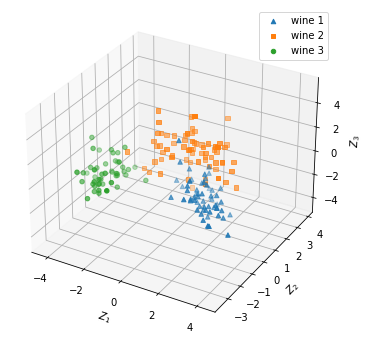

In [50]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
for e, group in enumerate(set(df['Customer_Segment'])):
    filt = df['Customer_Segment']==group
    ax.scatter(Z[filt,0], Z[filt,1], Z[filt,2], label=f'wine {group}', marker=markerlst[e])
ax.legend()
ax.set_xlabel(r'$Z_1$')
ax.set_ylabel(r'$Z_2$')
ax.set_zlabel(r'$Z_3$')
plt.show()

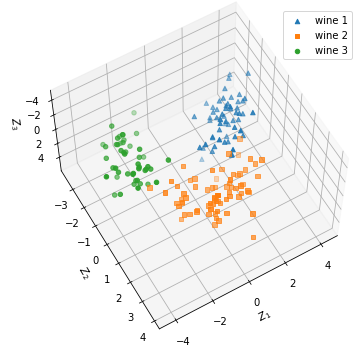

In [51]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
for e, group in enumerate(set(df['Customer_Segment'])):
    filt = df['Customer_Segment']==group
    ax.scatter(Z[filt,0], Z[filt,1], Z[filt,2], label=f'wine {group}', marker=markerlst[e])
ax.legend()
ax.set_xlabel(r'$Z_1$')
ax.set_ylabel(r'$Z_2$')
ax.set_zlabel(r'$Z_3$')
ax.view_init(-120, -60)
plt.show()

## 觀察 $Z_1$ 與 $Z_2$，發現哪個原變數比較重要？
$Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，如下式，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。
\begin{equation}
Z_1 = \mathbf{v}_1(1)X_1 + \mathbf{v}_1(2)X_2 + \cdots + \mathbf{v}_1(p)X_p
\end{equation}

<font color=#004D99>
</font>

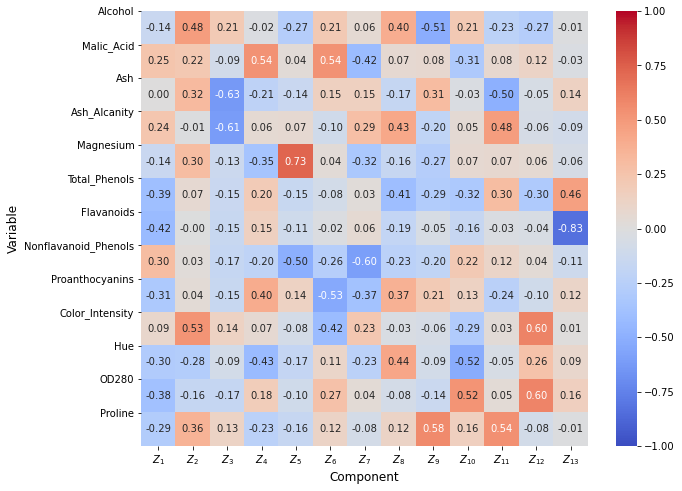

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(eigvecs, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.xlabel('Component', fontsize=12)
plt.xticks(np.arange(0.5,13.5),['$Z_{' + str(i) + '}$' for i in range(1,14)])
plt.ylabel('Variable', fontsize=12)
plt.yticks(range(13), df.iloc[:,:13].columns, rotation=0)
plt.show()